# Monte Carlo Simulation for FE
## IEOR 4703

### Analysis of the British Coal Mining Disaster data using a Gibbs sampler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('british_coal_mine_data.csv') # load csv file
print(data)

y = np.array(data['Accidents'])
print(y)

     Year  Accidents
0    1851          4
1    1852          5
2    1853          4
3    1854          1
4    1855          0
..    ...        ...
107  1958          0
108  1959          0
109  1960          1
110  1961          0
111  1962          1

[112 rows x 2 columns]
[4 5 4 1 0 4 3 4 0 6 3 3 4 0 2 6 3 3 5 4 5 3 1 4 4 1 5 5 3 4 2 5 2 2 3 4 2
 1 3 2 2 1 1 1 1 3 0 0 1 0 1 1 0 0 3 1 0 3 2 2 0 1 1 1 0 1 0 1 0 0 0 2 1 0
 0 0 1 1 0 2 3 3 1 1 2 1 1 1 1 2 4 2 0 0 0 1 4 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 1]


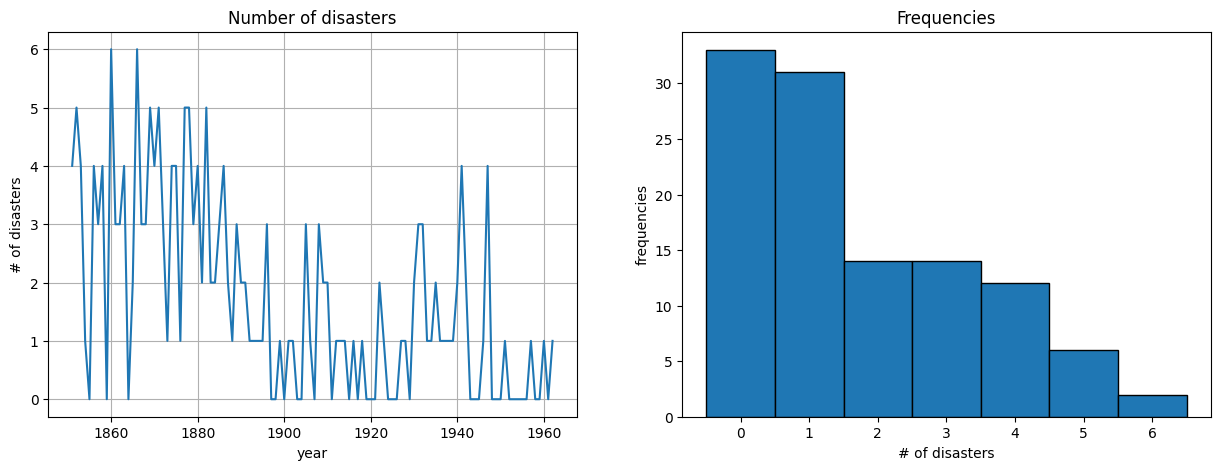

In [3]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(data['Year'], data['Accidents'])
plt.ylabel('# of disasters')
plt.xlabel('year')
plt.title('Number of disasters')
plt.grid()

plt.subplot(1, 2, 2)
edges = np.arange(-0.5, 7, 1)
plt.hist(y, bins=edges, edgecolor='black')
plt.xlabel('# of disasters')
plt.ylabel('frequencies')
plt.title('Frequencies')

plt.show()

### Switching Poisson processes

In [4]:
# Gibbs Sampling -- Full conditional distributions
m = len(y)

alpha1 = 20
beta1 = 10

alpha2 = 10
beta2 = 20

# intial value
mu = 7
lda = 10
k = 2

nIters = 500

muArray = np.zeros(nIters+1)
ldaArray = np.zeros(nIters+1)
kArray = np.zeros(nIters+1)

muArray[0] = mu
ldaArray[0] = lda
kArray[0] = k

likelihood = np.zeros(m)

for i in range(1, nIters+1):

    mu = np.random.gamma(alpha1+np.sum(y[:k]), 1./(k+beta1))
    lda = np.random.gamma(alpha2+np.sum(y[k:m]), 1./(m-k+beta2))

    # Construct p(k|mu,lda,x1,x2,...,xm)
    for k1 in range(m):
        likelihood[k1] = np.exp(np.sum(y[:k1])*np.log(mu) + np.sum(y[k1:m])*np.log(lda) - k1*(mu-lda))

    # CDF or CMF
    pK = np.cumsum(likelihood) / np.sum(likelihood)

    # Having p(k|mu,lda,x1,x2,...,xm), sample from it
    u = np.random.rand()
    for k1 in range(m):
        if k1 == 0:
            if u <= pK[k1]:
                k = 1
                break
        else:
            if (((u > pK[k1 - 1])) and (u <= pK[k1])):
                k = k1
                break

    muArray[i] = mu
    ldaArray[i] = lda
    kArray[i] = k

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\k'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:32: SyntaxWarning: invalid escape sequence '\k'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\k'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:32: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipython-input-2891155938.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu$')
/tmp/ipython-input-2891155938.py:13: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\lambda$')
/tmp/ipython-input-2891155938.py:18: SyntaxWarning: invalid escape sequence '\k'
  plt.ylabel('$\kappa$')
/tmp/ipython-input-2891155938.py:22: SyntaxWarning: invalid escape sequence

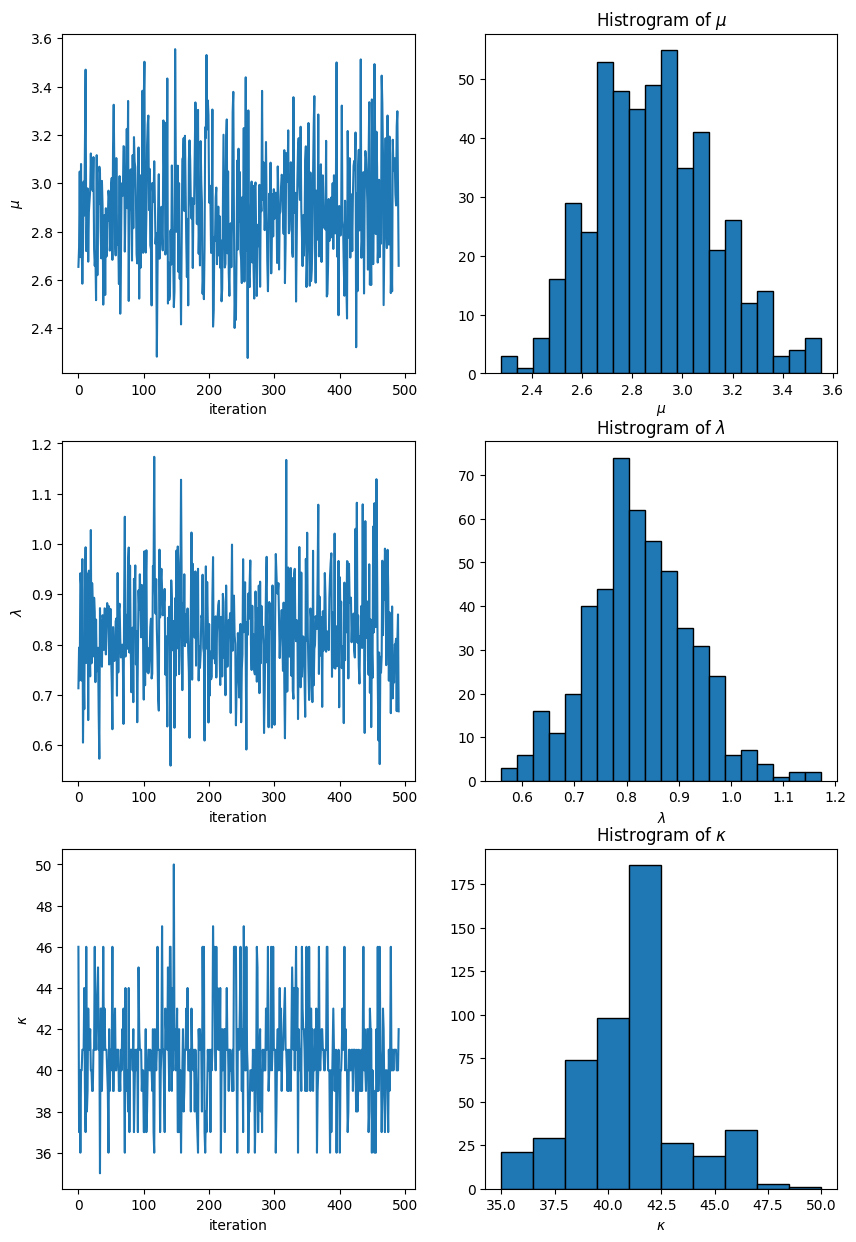

In [5]:
# Burn-in
b = 10
plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
plt.plot(muArray[b:])
plt.xlabel('iteration')
plt.ylabel('$\mu$')

plt.subplot(3,2,3)
plt.plot(ldaArray[b:])
plt.xlabel('iteration')
plt.ylabel('$\lambda$')

plt.subplot(3,2,5)
plt.plot(kArray[b:])
plt.xlabel('iteration')
plt.ylabel('$\kappa$')

plt.subplot(3,2,2)
plt.hist(muArray[b:], 20, edgecolor='black')
plt.xlabel('$\mu$')
plt.title(r'Histrogram of $\mu$')

plt.subplot(3,2,4)
plt.hist(ldaArray[b:], 20, edgecolor='black')
plt.xlabel('$\lambda$')
plt.title(r'Histrogram of $\lambda$')

plt.subplot(3,2,6)
plt.hist(kArray[b:], 10, edgecolor='black')
plt.xlabel('$\kappa$')
plt.title(r'Histrogram of $\kappa$')

plt.show()